# Visualize Result of PHILHARMONIC Analysis

Lorem ipsum dolor...

In [3]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from loguru import logger
from matplotlib import pyplot as plt

from pathlib import Path

from philharmonic.utils import (
    load_cluster_json,
    parse_GO_database,
    parse_GO_map,
    plot_cluster,
    print_cluster,
    write_cluster_cytoscape,
)

In [12]:
# Initial Files
# cluster_file_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_clusters.json"
# network_file_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_network.positive.tsv"
# go_map_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_GO_map.csv"

# GO_DATABASE = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/go.obo"
# IMG_DIR = Path("/mnt/home/ssledzieski/Projects/philharmonic-experiments/img/pdam")

# Initial Files
cluster_file_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/c_goreaui/20240926_philharmonic_v0.5.0_cgoreaui/20240926_cgoreaui_clusters.json"
network_file_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/c_goreaui/20240926_philharmonic_v0.5.0_cgoreaui/20240926_cgoreaui_network.positive.tsv"
go_map_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/c_goreaui/20240926_philharmonic_v0.5.0_cgoreaui/20240926_cgoreaui_GO_map.csv"

GO_DATABASE = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/c_goreaui/20240926_philharmonic_v0.5.0_cgoreaui/go.obo"
IMG_DIR = Path("/mnt/home/ssledzieski/Projects/philharmonic-experiments/img/cgor")

# # Initial Files
# cluster_file_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/d_melanogaster/20240913-dmelaAll-phil_v0.2.0/20240912-dmelaAll-phil_v0.2.0_clusters.json"
# network_file_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/d_melanogaster/20240913-dmelaAll-phil_v0.2.0/20240912-dmelaAll-phil_v0.2.0_network.positive.tsv"
# go_map_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/d_melanogaster/20240913-dmelaAll-phil_v0.2.0/20240912-dmelaAll-phil_v0.2.0_GO_map.csv"
# GO_DATABASE = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/d_melanogaster/20240913-dmelaAll-phil_v0.2.0/go.obo"
# IMG_DIR = Path("/mnt/home/ssledzieski/Projects/philharmonic-experiments/img/dmel")

In [13]:
clusters = load_cluster_json(cluster_file_path)
full_G = nx.read_weighted_edgelist(network_file_path)
go_map = parse_GO_map(go_map_path)
go_database = parse_GO_database(GO_DATABASE)

---

## Basic Network Statistics

In [14]:
label = ["Nodes", "Edges", "Degree (Med)", "Degree (Avg)", "Sparsity"]
degrees = [i[1] for i in list(full_G.degree())]
value = [
    len(full_G.nodes),
    len(full_G.edges),
    np.median(degrees),
    np.mean(degrees),
    len(full_G.edges()) / len(full_G) ** 2,
]
df = pd.DataFrame([label, value]).T
df.columns = ["", "Network"]
df = df.set_index("")
df

,Network
,
Nodes,8204
Edges,568536
Degree (Med),44.5
Degree (Avg),138.599707
Sparsity,0.008447


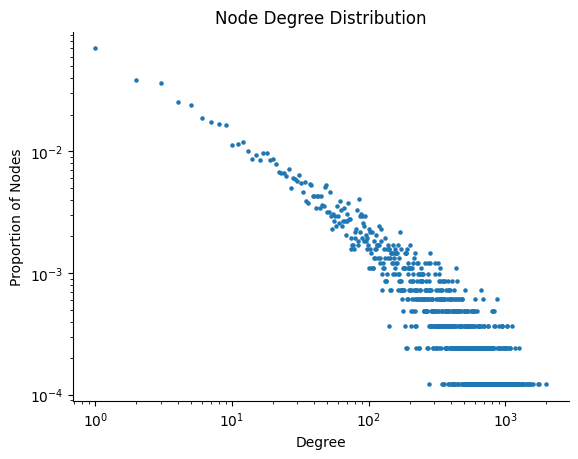

In [15]:
degreeDist = {}
for i in degrees:
    n = degreeDist.setdefault(i, 0)
    degreeDist[i] = n + 1

plt.scatter(degreeDist.keys(), [i / len(full_G) for i in degreeDist.values()], s=5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree")
plt.ylabel("Proportion of Nodes")
plt.title("Node Degree Distribution")
plt.savefig(IMG_DIR / "degree_distribution.svg", bbox_inches="tight", dpi=300)
sns.despine()

---

## Basic Cluster Statistics

In [16]:
logger.info(f"Number of clusters: {len(clusters)}")

2024-10-17 09:52:05.738 | INFO     | __main__:<module>:1 - Number of clusters: 545


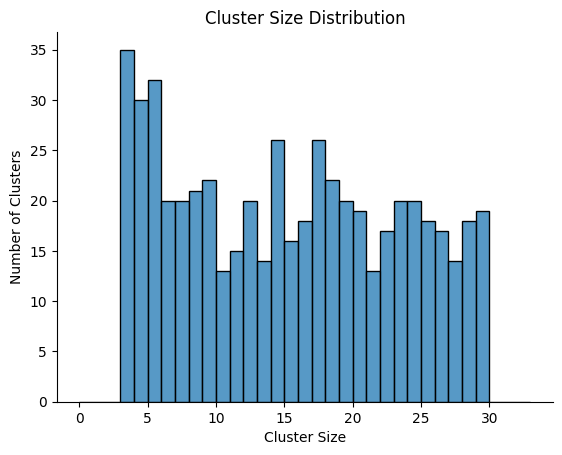

In [17]:
sizes = [len(i["members"]) for i in clusters.values()]
sns.histplot(sizes, bins=np.arange(0, max(sizes) + 5, max(sizes) // 20))
plt.xlabel("Cluster Size")
plt.ylabel("Number of Clusters")
plt.title("Cluster Size Distribution")
sns.despine()
plt.savefig(IMG_DIR / "size_distribution.svg", bbox_inches="tight", dpi=300)
plt.show()

---

## View Individual Clusters

In [124]:
# Coral
# k = "208641124039621440" # sam original
# k = "1495076087230339862" # blue
# k = "1823305451748972384" # green
# k = "889733293002804025" # purple
# k = "363014559509114069" # red
# k = "1238085533603602511" # brown
# k = "803905878821692717" # orange
# k = "1468420370922021553"

# Symbiont
# k = "1986207034231625260" # transmembrane transport process
# k = "159951644591660094" # transmembrane transport of various molecules
# k = "2274086192540508687" # transmembrane transport of various compounds
# k = "624885812819635276" # transmembrane transport and metabolic regulationq
# k = "2157098768484303654"
# k = "584015318811626945"
# k = "836810842132368477"
k = "672199876736333114"


# k = "666417111483109151" # blue
# k = "346047606648335785" # purple
# k = "1392983895766005032" # brown
# k = "2283187423858294796" # green
# k = "1067145172069621717" # hotpink
# k = "1368015733795514113" # teal

In [125]:
print_cluster(clusters[k], go_database, 20)

Cluster of 8 proteins [SymbC1.scaffold1742.12, SymbC1.scaffold5663.5, SymbC1.scaffold32079.1, ...] (hash 672199876736333114)
0 proteins re-added by ReCIPE (degree, 0.75)
Edges: 9
Triangles: 2
Max Degree: 5
Top Terms:
		GO:0045087 - <innate immune response> (3)
		GO:0006351 - <DNA-templated transcription> (2)
		GO:0019878 - <lysine biosynthetic process via aminoadipic acid> (2)
		GO:0009102 - <biotin biosynthetic process> (2)
		GO:0006782 - <protoporphyrinogen IX biosynthetic process> (2)
		GO:0055114 - <obsolete oxidation-reduction process> (2)
		GO:0001935 - <endothelial cell proliferation> (2)
		GO:0018057 - <peptidyl-lysine oxidation> (2)
		GO:0001837 - <epithelial to mesenchymal transition> (2)
		GO:0006883 - <intracellular sodium ion homeostasis> (2)
		GO:0010886 - <positive regulation of cholesterol storage> (2)
		GO:0034381 - <plasma lipoprotein particle clearance> (2)
		GO:0031638 - <zymogen activation> (2)
		GO:0006958 - <complement activation, classical pathway> (2)
		GO:1904

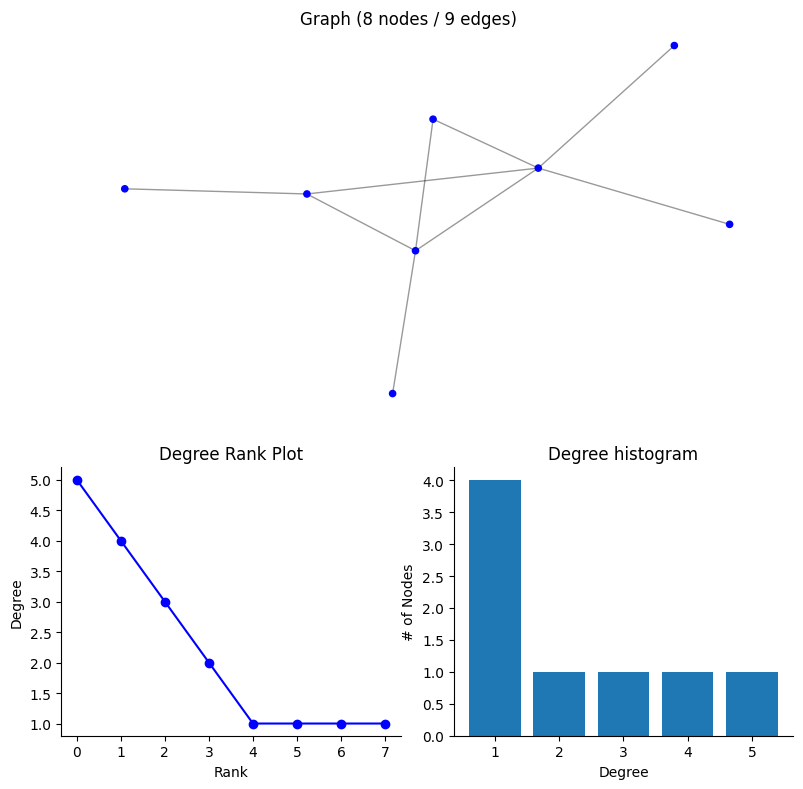

In [126]:
# plot_cluster(
#     clusters[k], full_G, use_recipe=True, savefig="../img/readme_sample_cluster.jpg"
# )
plot_cluster(
    clusters[k], full_G, use_recipe=True, savefig=None
)

In [23]:
write_cluster_cytoscape(clusters[k], full_G, f"{k}_cytoscape.txt")

In [24]:
for p in sorted(clusters[k]["members"] + list(clusters[k]["recipe"]["degree"]["0.75"])):
    # if "GO:0071502" in go_map[p/]:
    print(p)

SymbC1.scaffold10891.1
SymbC1.scaffold19.140
SymbC1.scaffold20.307
SymbC1.scaffold21.80
SymbC1.scaffold2148.2
SymbC1.scaffold241.113
SymbC1.scaffold2538.1
SymbC1.scaffold26836.2
SymbC1.scaffold2726.4
SymbC1.scaffold3459.6
SymbC1.scaffold3871.1
SymbC1.scaffold3998.31
SymbC1.scaffold4.1591
SymbC1.scaffold4197.2
SymbC1.scaffold497.1
SymbC1.scaffold6731.6
SymbC1.scaffold685.22
SymbC1.scaffold688.7
SymbC1.scaffold80.118


## Overall ReCIPE Stats

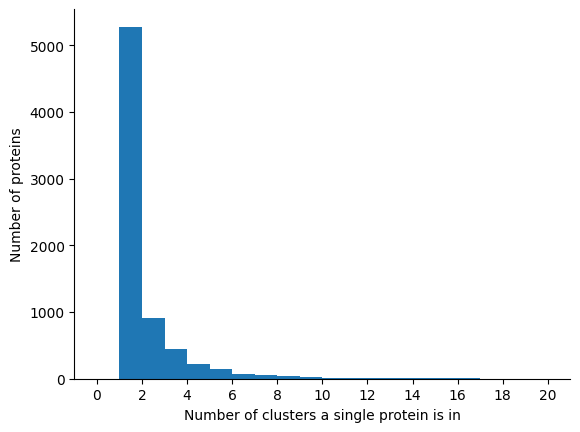

In [70]:
from collections import Counter
node_appearances = list()
for clust in clusters.values():
    for mn in clust["members"]:
        node_appearances.append(mn)
    for rn in clust["recipe"]["degree"]["0.75"]:
        node_appearances.append(rn)
nodes_counter = Counter(node_appearances)
plt.hist(nodes_counter.values(), bins=np.arange(0,21,1))
# xtick labels every 5
plt.xticks(np.arange(0, 21, 2))
plt.xlabel("Number of clusters a single protein is in")
plt.ylabel("Number of proteins")
sns.despine()
plt.savefig(IMG_DIR / "protein_number_of_clusters.png", bbox_inches="tight", dpi=300)
plt.show()